# **DeepLeaf: A Deep Learning Approach to Classifying Grape Disease**

# Commands to import kaggle dataset using kaggle api token

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/KaggleApiToken/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:08<00:00, 280MB/s]
100% 2.04G/2.04G [00:08<00:00, 247MB/s]


In [ ]:
! unzip plantvillage-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e6938d9-1ab0-4728-993c-1069b66ce73b___UF.GRC_YLCV_Lab 02727_final_mas

# Applied on Grape Esca (Black Measles)

### Image Preprocessing and Augmentation for Plant Disease Classification in the PlantVillage Dataset

Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/d6591397-135c-4992-ade7-dad53d891796___FAM_B.Msls 1169.JPG
Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/551a1310-87e2-4a9e-a513-ce8c7193d0bd___FAM_B.Msls 1114.JPG
Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/bd43f935-acbc-4880-b05f-bbb0eaa1cafb___FAM_B.Msls 4223.JPG
Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/316ccd32-0e9c-40bb-869b-1378cebdb6a0___FAM_B.Msls 0968.JPG
Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/20e25c4b-f2ff-41bc-b8ed-27e04e057db6___FAM_B.Msls 0865.JPG
Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/342908ce-8cad-40e9-a422-d7744e079292___FAM_B.Msls 0869.JPG
Processing file: /content/plantvillage dataset/color/Grape___Esca_(Black_Measles)/81a1b9ac-4e0e-4bd0-aa3a-ffa4448e34ff___FAM_B.Msls 1828.JPG
Processing fi

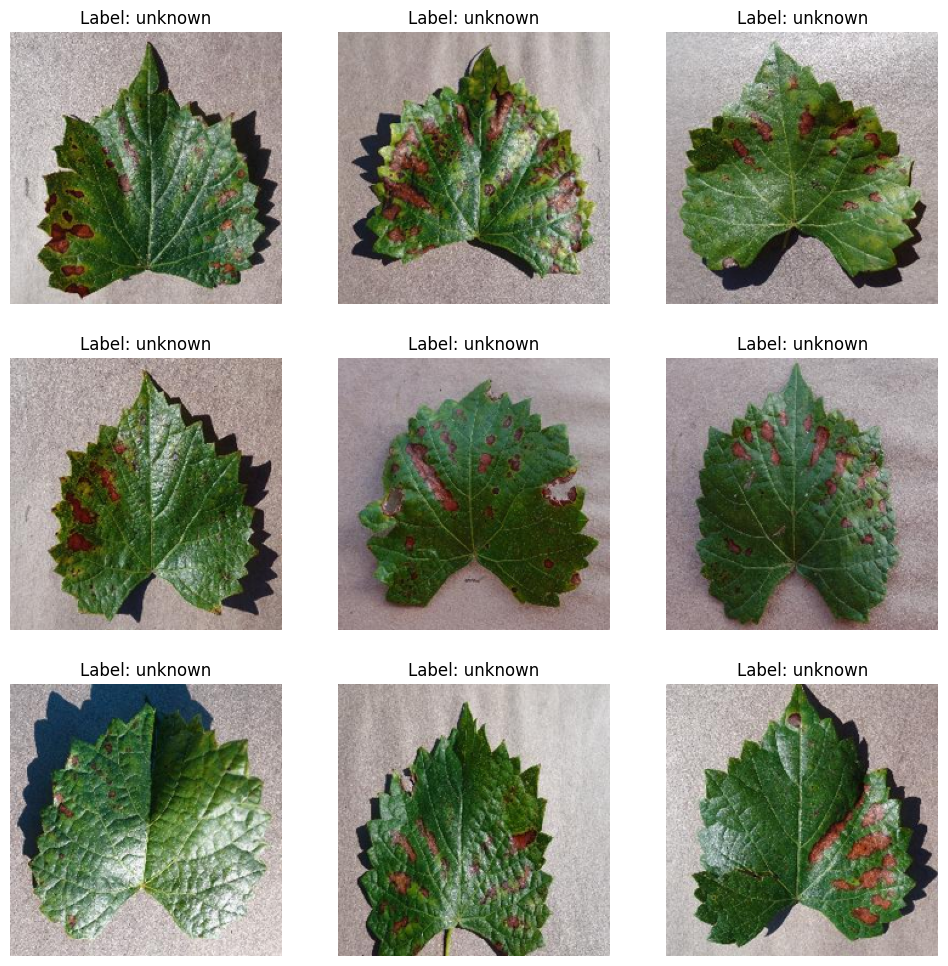

Preprocessing complete. Images and labels saved to images.npy, labels.npy, augmented_images.npy, and augmented_labels.npy.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import logging
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = '/content/plantvillage dataset/color'

# Set image size
IMG_HEIGHT, IMG_WIDTH = 224, 224

# Function to load images and their corresponding labels
def load_images(dataset_path):
    images = []
    labels = []

    # Define the specific folders to load
    target_folders = ['Grape___Esca_(Black_Measles)', 'Grape___healthy']

    for folder in target_folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue

        for root, _, files in os.walk(folder_path):
            for name in files:
                if name.lower().endswith((".jpg", ".png")):
                    img_path = os.path.join(root, name)
                    print(f"Processing file: {img_path}")  # Debugging statement
                    try:
                        img = Image.open(img_path).convert('RGB')  # Ensure image is in RGB format
                        img = img.resize((IMG_HEIGHT, IMG_WIDTH))
                        images.append(np.array(img))
                        labels.append('unknown')  # Use the folder name as the label
                    except Exception as e:
                        logging.error(f"Error processing file {img_path}: {e}")

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Load images
images, labels = load_images(dataset_path)

print(f"Number of images loaded: {len(images)}")  # Debugging statement

# Normalize images
images = images / 255.0  # Normalize pixel values to [0, 1]

# Data Augmentation setup
datagen = ImageDataGenerator(
    rescale=1./255,  # This is not needed since images are already normalized
    rotation_range=50,  # Random rotation between -50 and 50 degrees
    width_shift_range=0.25,  # Random horizontal shift up to 25% of image width
    height_shift_range=0.25,  # Random vertical shift up to 25% of image height
    shear_range=0.25,  # Random shear up to 25% of image size
    zoom_range=0.25,  # Random zoom up to 25% of image size
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for interpolation
)

# Display sample images with labels
def display_sample_images(images, labels):
    if len(images) == 0:
        print("No images to display.")
        return

    plt.figure(figsize=(12, 12))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Already normalized
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

display_sample_images(images, labels)

# Augment images
augmented_images = []
augmented_labels = []

for img, label in zip(images, labels):
    img = img.reshape((1,) + img.shape)  # Reshape for data generator
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])  # Append augmented images
        augmented_labels.append(label)
        if len(augmented_images) >= 100:  # Limit to 100 augmented images for this example
            break

# Convert to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Save images and labels to file
np.save('images.npy', images)
np.save('labels.npy', labels)
np.save('augmented_images.npy', augmented_images)
np.save('augmented_labels.npy', augmented_labels)

print('Preprocessing complete. Images and labels saved to images.npy, labels.npy, augmented_images.npy, and augmented_labels.npy.')


### Feature Extraction from Original and Augmented Images Using ResNet50 for Plant Disease Classification

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array

# Load both original and augmented images
original_images = np.load('images.npy')
augmented_images = np.load('augmented_images.npy')

# Initialize ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract features
def extract_features(image_data):
    features = []
    batch_size = 32  # You can adjust this based on your available memory
    for i in range(0, len(image_data), batch_size):
        batch = image_data[i:i + batch_size]
        batch = np.array([img_to_array(img) for img in batch])  # Convert to array if not already
        batch = batch / 255.0  # Normalize images
        batch_features = resnet_model.predict(batch)  # Get features for the batch
        features.append(batch_features)
    return np.concatenate(features, axis=0)

# Extract features from original images
original_features = extract_features(original_images)

# Extract features from augmented images
augmented_features = extract_features(augmented_images)

# Combine features from both sets
combined_features = np.vstack((original_features, augmented_features))

# Reshape the combined features
combined_features = combined_features.reshape(combined_features.shape[0], -1)  # Flatten

# Save combined features to a file
np.save('combined_features.npy', combined_features)
print('Feature extraction complete. Combined features saved to combined_features.npy.')

1/1 [==============================] - 0s 311ms/step
Feature extraction complete. Combined features saved to combined_features.npy.


### Clustering Analysis of Extracted Features Using K-Means and DBSCAN for Plant Disease Classification

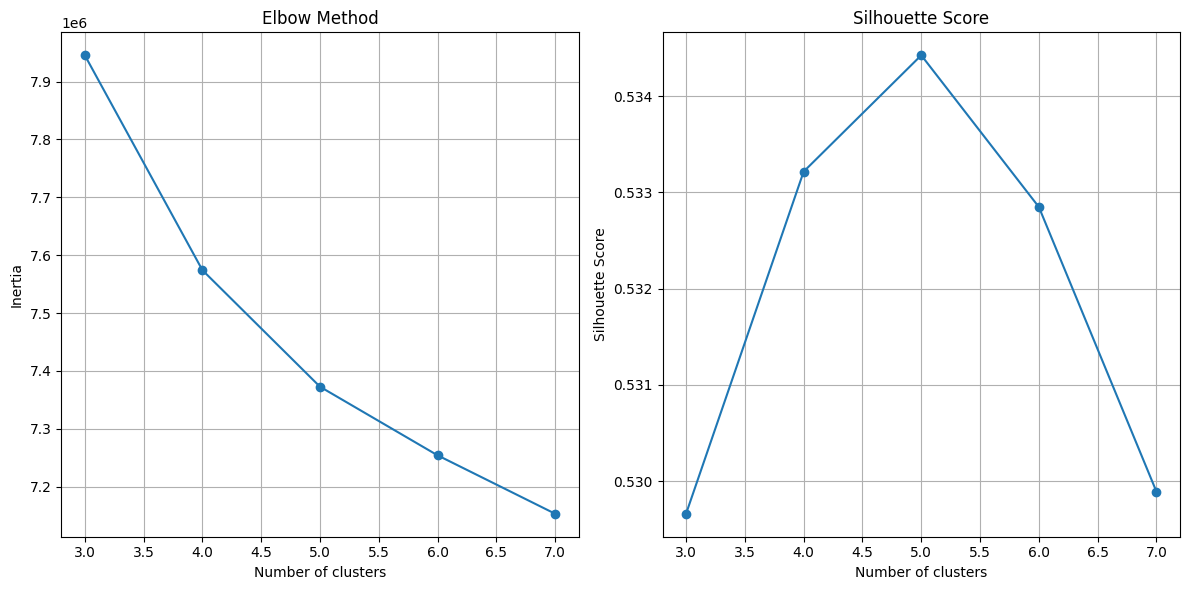

Optimal number of clusters: 5
Silhouette Score for k=5: 0.534


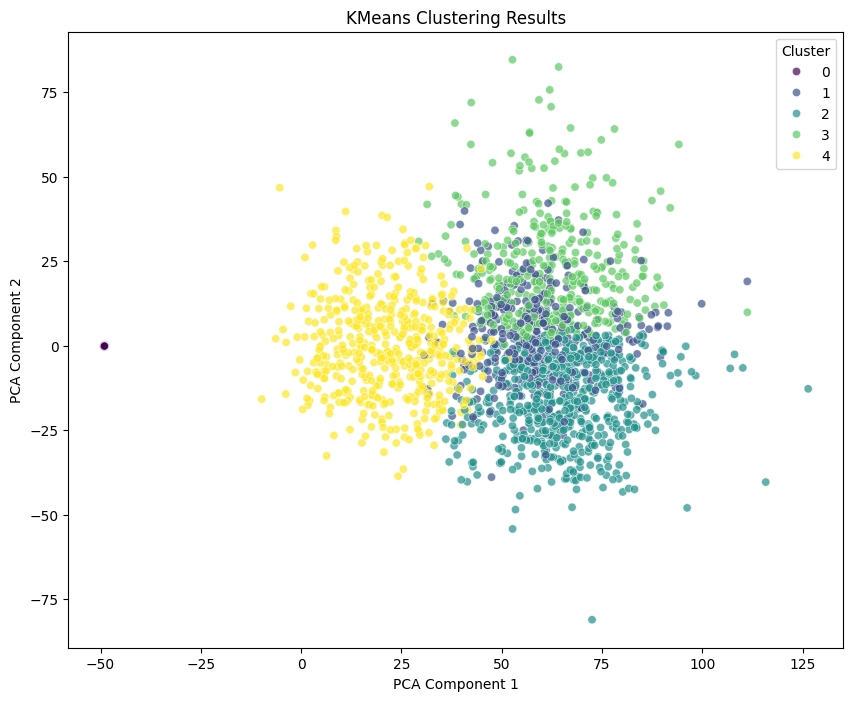

Silhouette Score for DBSCAN: -0.446


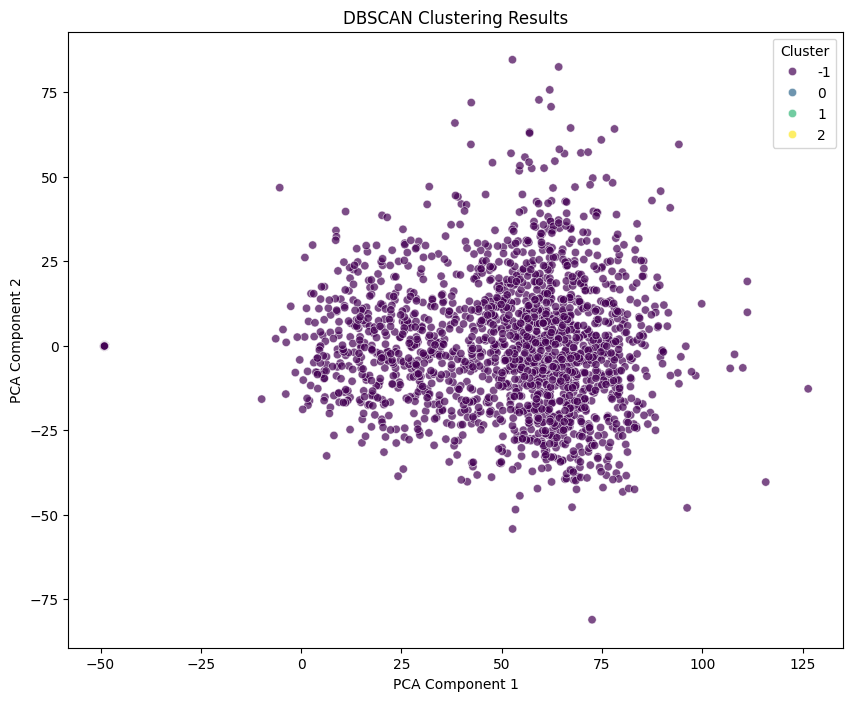

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load combined features
combined_features = np.load('combined_features.npy')

# Standardize features
combined_features = StandardScaler().fit_transform(combined_features)

# Function to visualize clusters
def plot_clusters(features, labels, title='Cluster Visualization'):
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=labels, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()

# Elbow method and silhouette scores for KMeans
inertia = []
silhouette_scores = []
k_values = range(3, 8)  # Testing for 3 to 7 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0, verbose=0)  # Turn off verbosity
    kmeans.fit(combined_features)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(combined_features, labels)
    silhouette_scores.append(silhouette_avg)

# Plotting Elbow Method and Silhouette Score
plt.figure(figsize=(12, 6))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the best silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {best_k}')

# Perform K-Means clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=0).fit(combined_features)
labels = kmeans.labels_

# Calculate the silhouette score for the chosen k
silhouette_avg = silhouette_score(combined_features, labels)
print(f'Silhouette Score for k={best_k}: {silhouette_avg:.3f}')

# Visualize the clusters
plot_clusters(combined_features, labels, title='KMeans Clustering Results')

# Experiment with DBSCAN with adjusted parameters
dbscan_params = [
    {'eps': 0.3, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 10},
    {'eps': 0.7, 'min_samples': 5},
]

for params in dbscan_params:
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples']).fit(combined_features)
    dbscan_labels = dbscan.labels_

    # Calculate silhouette score for DBSCAN (ignore noise points)
    if len(set(dbscan_labels)) > 1:  # More than one cluster
        silhouette_avg_dbscan = silhouette_score(combined_features, dbscan_labels)
        print(f'Silhouette Score for DBSCAN (eps={params["eps"]}, min_samples={params["min_samples"]}): {silhouette_avg_dbscan:.3f}')
        plot_clusters(combined_features, dbscan_labels, title=f'DBSCAN Clustering Results (eps={params["eps"]})')
    else:
        print(f'DBSCAN found only one cluster or noise (eps={params["eps"]}, min_samples={params["min_samples"]}).')



### K-Means Clustering and Visualization of Plant Disease Images with PCA

Silhouette Score for k=5: 0.534


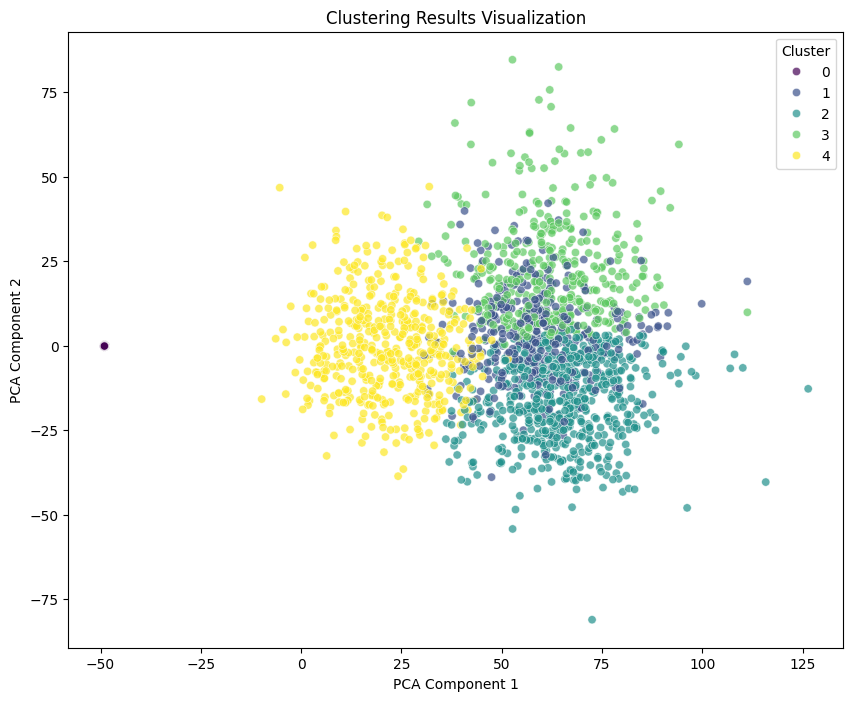

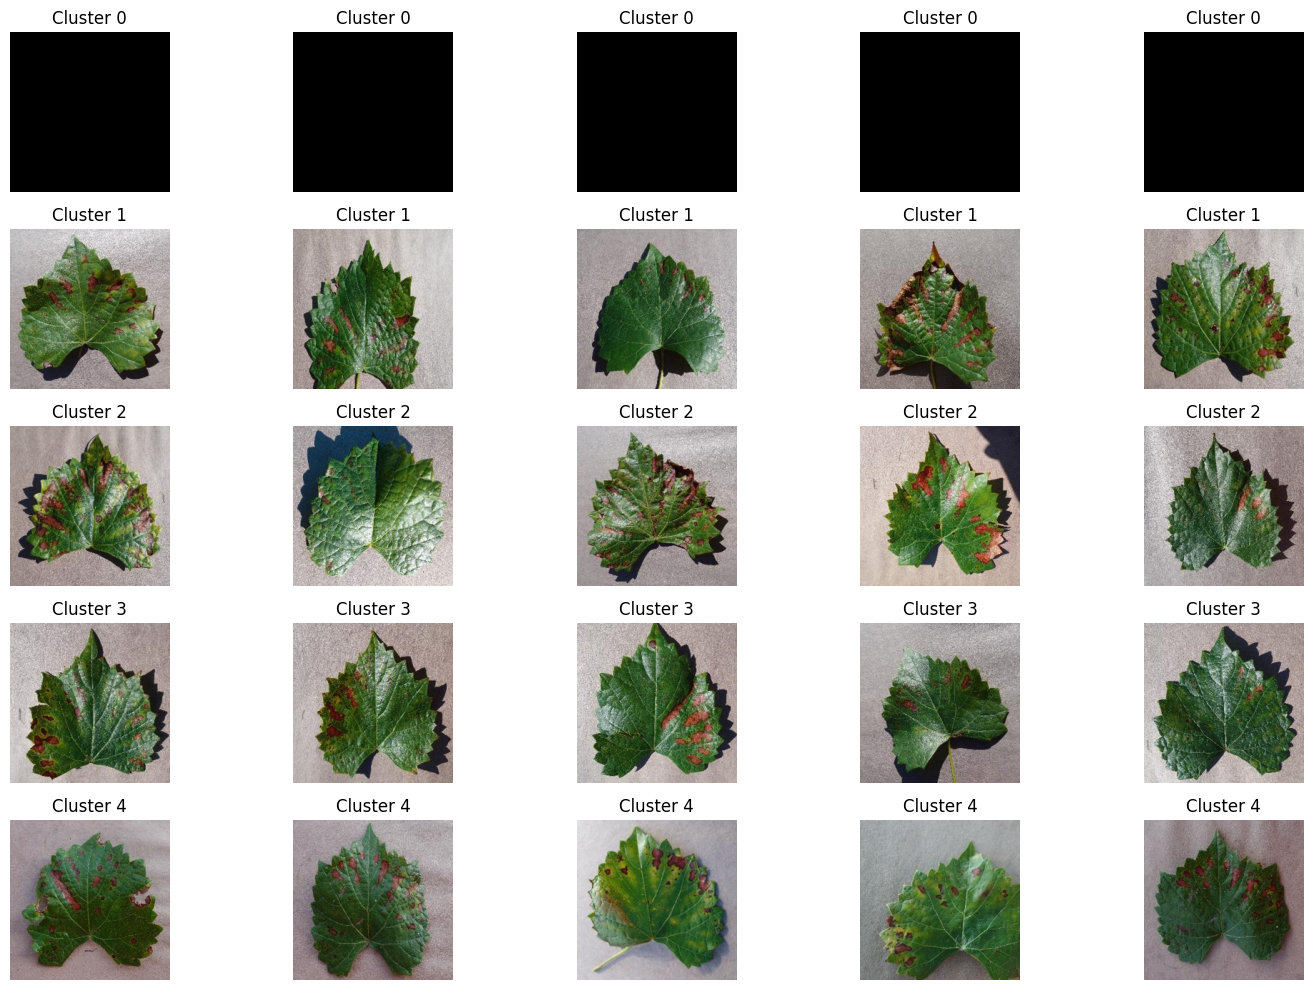

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load combined features
combined_features = np.load('combined_features.npy')

# Load original and augmented images
original_images = np.load('images.npy')  # Load your original images
augmented_images = np.load('augmented_images.npy')  # Load your augmented images

# Combine original and augmented images
all_images = np.concatenate((original_images, augmented_images), axis=0)

# Standardize features
combined_features = StandardScaler().fit_transform(combined_features)

# Perform KMeans clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
kmeans.fit(combined_features)

# Get cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(combined_features, labels)
print(f'Silhouette Score for k={n_clusters}: {silhouette_avg:.3f}')

# PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(combined_features)

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=labels, palette='viridis', alpha=0.7)
plt.title('Clustering Results Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Function to visualize 5 images from each cluster
def plot_images_from_clusters(images, labels, n_clusters=5, n_images=5):
    plt.figure(figsize=(15, 10))

    for cluster in range(n_clusters):
        cluster_indices = np.where(labels == cluster)[0][:n_images]  # Get indices of images in the cluster
        for i, idx in enumerate(cluster_indices):
            plt.subplot(n_clusters, n_images, cluster * n_images + i + 1)
            plt.imshow(images[idx])  # Load the image
            plt.axis('off')
            plt.title(f'Cluster {cluster}')

    plt.tight_layout()
    plt.show()

# Call the function to display images
plot_images_from_clusters(all_images, labels)


### Cluster Label Assignment and Visualization of Plant Disease Images

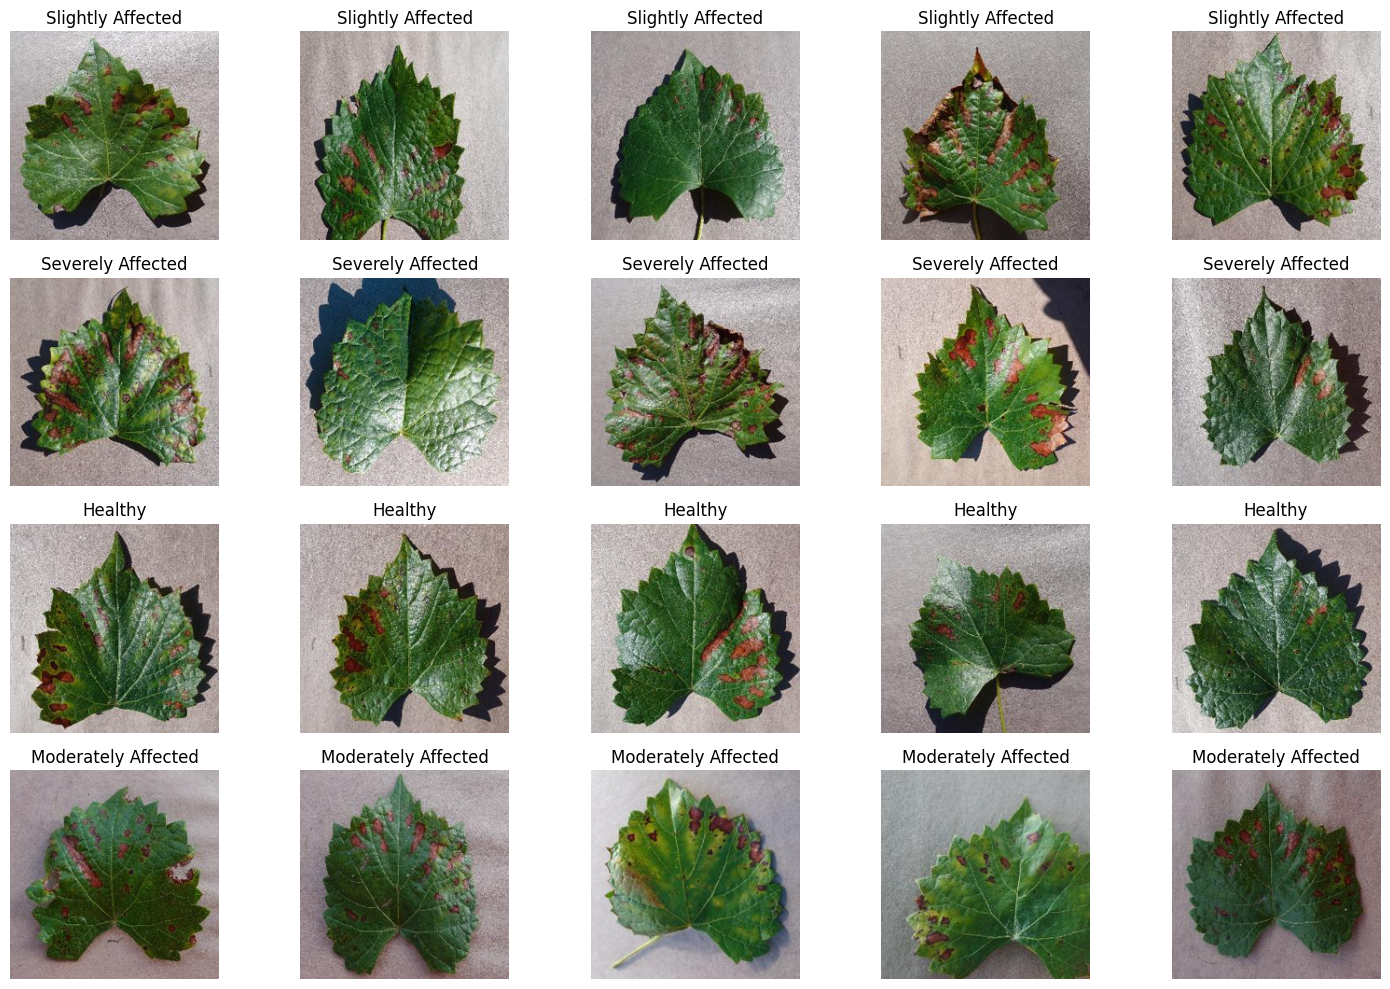

In [ ]:
# Define label mapping based on the clusters
label_mapping = {
    3: "Healthy",
    1: "Slightly Affected",
    4: "Moderately Affected",
    2: "Severely Affected",
    0: "Completely Spoiled" # This will be ignored in plotting
}

# Assign labels to each data point based on the cluster
assigned_labels = [label_mapping[label] for label in labels]

# Create a DataFrame for better visualization and saving
results_df = pd.DataFrame({
    'Image Index': range(len(assigned_labels)),
    'Assigned Label': assigned_labels
})

# Save results to a CSV file
results_df.to_csv('clustered_labels.csv', index=False)

# Function to visualize labeled images from each cluster
def plot_labeled_images(images, labels, assigned_labels, n_clusters=5, n_images=5):
    plt.figure(figsize=(15, 10))

    # Only loop through clusters that are not ignored (skip cluster 0)
    for cluster in range(1, n_clusters):  # Start from 1 to skip cluster 0
        cluster_indices = np.where(labels == cluster)[0][:n_images]  # Get indices of images in the cluster
        for i, idx in enumerate(cluster_indices):
            plt.subplot(n_clusters - 1, n_images, (cluster - 1) * n_images + i + 1)  # Adjust subplot indexing
            plt.imshow(images[idx])  # Load the image
            plt.axis('off')
            plt.title(f'{assigned_labels[idx]}')

    plt.tight_layout()
    plt.show()

# Call the function to display labeled images
plot_labeled_images(all_images, labels, assigned_labels)


## Model 1

### Training a Fine-Tuned ResNet50 Model for Plant Disease Classification with Class Imbalance Handling and 50 Epochs

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load both original and augmented images
original_images = np.load('images.npy')  # Load original images
augmented_images = np.load('augmented_images.npy')  # Load augmented images
images = np.concatenate((original_images, augmented_images), axis=0)

# Convert string labels to numerical labels
labels_encoded = LabelEncoder().fit_transform(labels)  # Ensure 'labels' is defined

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Resize images for faster training
target_size = (128, 128)  # Increased image size for better feature extraction
train_images = tf.image.resize(train_images, target_size)
val_images = tf.image.resize(val_images, target_size)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Unfreeze last 10 layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Define the model with updated architecture
def create_model():
    model = Sequential([
        base_model,
        Flatten(),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(labels_encoded)), activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Prepare the dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
model = create_model()
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=50,  # Increased number of epochs
                    validation_data=val_dataset,
                    callbacks=[early_stopping, model_checkpoint, lr_schedule],
                    class_weight=class_weights)

Epoch 1/50
93/93 [==============================] - ETA: 0s - loss: 1.5799 - accuracy: 0.6250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 89s 787ms/step - loss: 1.5799 - accuracy: 0.6250 - val_loss: 1.4953 - val_accuracy: 0.4859 - lr: 1.0000e-04
Epoch 2/50
93/93 [==============================] - 71s 765ms/step - loss: 1.2485 - accuracy: 0.7082 - val_loss: 2.1554 - val_accuracy: 0.4859 - lr: 1.0000e-04
Epoch 3/50
93/93 [==============================] - 71s 759ms/step - loss: 1.1426 - accuracy: 0.7224 - val_loss: 1.9337 - val_accuracy: 0.4953 - lr: 1.0000e-04
Epoch 4/50
93/93 [==============================] - 72s 770ms/step - loss: 1.0241 - accuracy: 0.7423 - val_loss: 1.3023 - val_accuracy: 0.5882 - lr: 1.0000e-04
Epoch 5/50
93/93 [==============================] - 71s 757ms/step - loss: 0.9465 - accuracy: 0.7621 - val_loss: 1.3308 - val_accuracy: 0.6097 - lr: 1.0000e-04
Epoch 6/50
93/93 [==============================] - 71s 761ms/step - loss: 0.9584 - accuracy: 0.7591 - val_loss: 1.7744 - val_accuracy: 0.6312 - lr: 1.0000e-04
Epoch 7/50
93/93 [==============================] -

### Model Evaluation and Training Metrics Visualization

24/24 [==============================] - 4s 171ms/step - loss: 0.4883 - accuracy: 0.8210
Validation Loss=0.488, Validation Accuracy=0.821


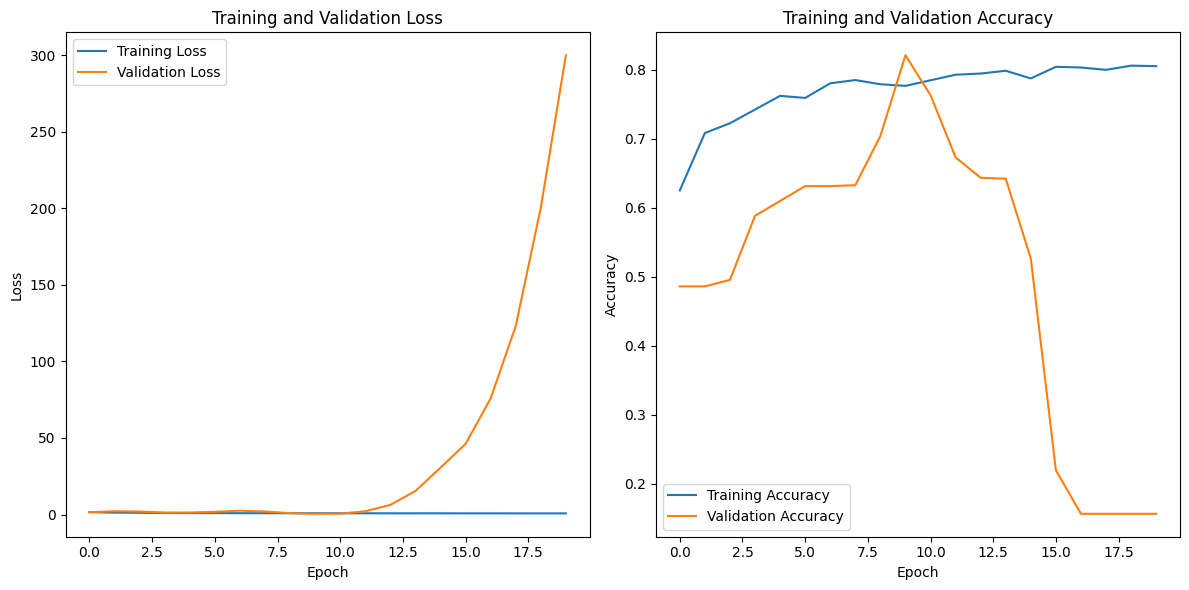

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print(f'Validation Loss={loss:.3f}, Validation Accuracy={accuracy:.3f}')

# Plot training and validation metrics using Seaborn
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history.history['loss'], label='Training Loss')
sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Confusion Matrix Visualization for Model Predictions

24/24 [==============================] - 5s 184ms/step


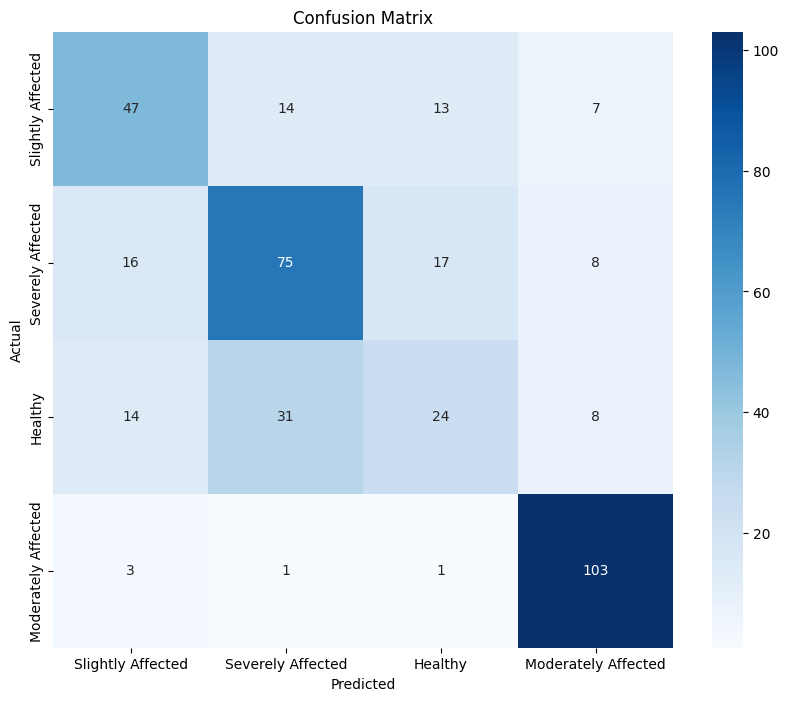

In [ ]:
from sklearn.metrics import confusion_matrix
# Define label mapping based on the clusters
label_mapping = {
    3: "Healthy",
    1: "Slightly Affected",
    4: "Moderately Affected",
    2: "Severely Affected",
    0: "Completely Spoiled"  # This will be ignored in plotting
}

# Create severity labels in the correct order
severity_labels = [label_mapping[i] for i in range(len(label_mapping)) if i != 0]

# Confusion Matrix
val_predictions = model.predict(val_images)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Generate and visualize the confusion matrix
cm = confusion_matrix(val_labels, val_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm[1:, 1:], annot=True, fmt='d', cmap='Blues',  # Ignore the first row and column for "Completely Spoiled"
             xticklabels=severity_labels,
             yticklabels=severity_labels)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### AUC-ROC Curve Visualization for Multi-Class Classification

24/24 [==============================] - 5s 187ms/step


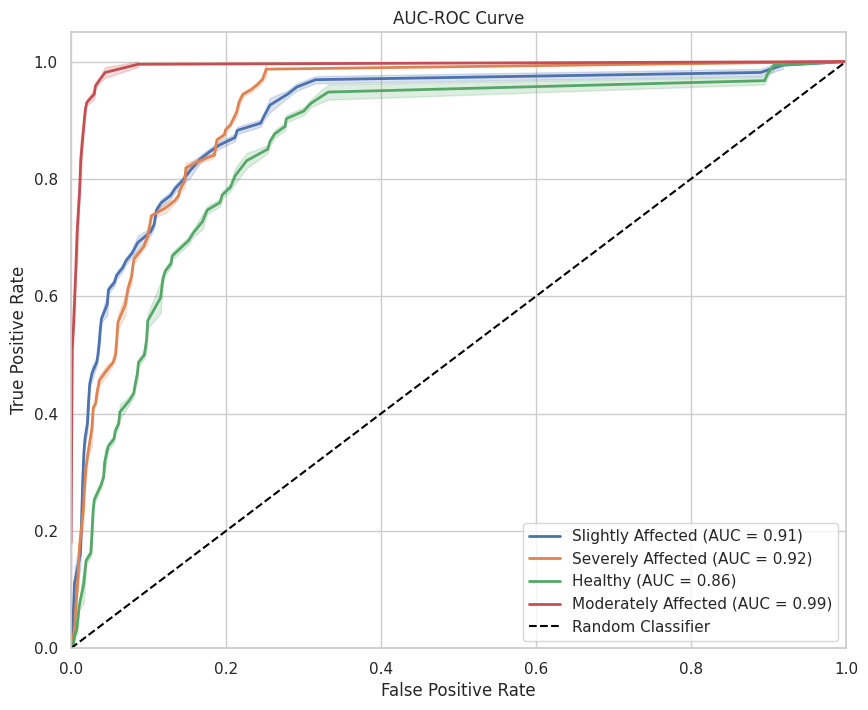

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have the true labels and predictions
val_labels_binarized = label_binarize(val_labels, classes=[0, 1, 2, 3, 4])  # Update with actual number of classes
n_classes = val_labels_binarized.shape[1]

# Get predicted probabilities
val_predictions_prob = model.predict(val_images)  # Ensure this gives you class probabilities

# Initialize lists to hold FPR, TPR, and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate FPR, TPR and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_labels_binarized[:, i], val_predictions_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plotting the AUC-ROC curve
plt.figure(figsize=(10, 8))

# Plot each class's AUC-ROC curve
for i in range(1, n_classes):  # Start from 1 to skip "Completely Spoiled"
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{severity_labels[i-1]} (AUC = {roc_auc[i]:.2f})', linewidth=2)

# Plot the diagonal line for a random classifier
sns.lineplot(x=[0, 1], y=[0, 1], label='Random Classifier', color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Model 2


### Training a Fine-Tuned ResNet50 Model for Plant Disease Classification with Class Imbalance Handling and 10 Epochs

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load both original and augmented images
original_images = np.load('images.npy')  # Load original images
augmented_images = np.load('augmented_images.npy')  # Load augmented images
images = np.concatenate((original_images, augmented_images), axis=0)

# Convert string labels to numerical labels
labels_encoded = LabelEncoder().fit_transform(labels)  # Ensure 'labels' is defined

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Resize images for faster training
target_size = (128, 128)  # Increased image size for better feature extraction
train_images = tf.image.resize(train_images, target_size)
val_images = tf.image.resize(val_images, target_size)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

# Unfreeze last 10 layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Define the model with updated architecture
def create_model():
    model = Sequential([
        base_model,
        Flatten(),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(labels_encoded)), activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Prepare the dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model
model = create_model()
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=[early_stopping, model_checkpoint, lr_schedule],
                    class_weight=class_weights)

Epoch 1/10
93/93 [==============================] - ETA: 0s - loss: 1.6300 - accuracy: 0.6146

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


93/93 [==============================] - 91s 794ms/step - loss: 1.6300 - accuracy: 0.6146 - val_loss: 1.5228 - val_accuracy: 0.4859 - lr: 1.0000e-04
Epoch 2/10
93/93 [==============================] - 71s 764ms/step - loss: 1.3531 - accuracy: 0.6853 - val_loss: 2.1750 - val_accuracy: 0.4859 - lr: 1.0000e-04
Epoch 3/10
93/93 [==============================] - 72s 776ms/step - loss: 1.1861 - accuracy: 0.7183 - val_loss: 2.4973 - val_accuracy: 0.4886 - lr: 1.0000e-04
Epoch 4/10
93/93 [==============================] - 70s 750ms/step - loss: 1.0978 - accuracy: 0.7399 - val_loss: 2.5359 - val_accuracy: 0.5007 - lr: 1.0000e-04
Epoch 5/10
93/93 [==============================] - 72s 769ms/step - loss: 0.9973 - accuracy: 0.7554 - val_loss: 1.6180 - val_accuracy: 0.5976 - lr: 5.0000e-05
Epoch 6/10
93/93 [==============================] - 71s 765ms/step - loss: 0.9284 - accuracy: 0.7642 - val_loss: 1.5531 - val_accuracy: 0.6285 - lr: 5.0000e-05
Epoch 7/10
93/93 [==============================] -

### Model Evaluation and Training Metrics Visualization

24/24 [==============================] - 4s 182ms/step - loss: 0.4917 - accuracy: 0.7793
Validation Loss=0.492, Validation Accuracy=0.779


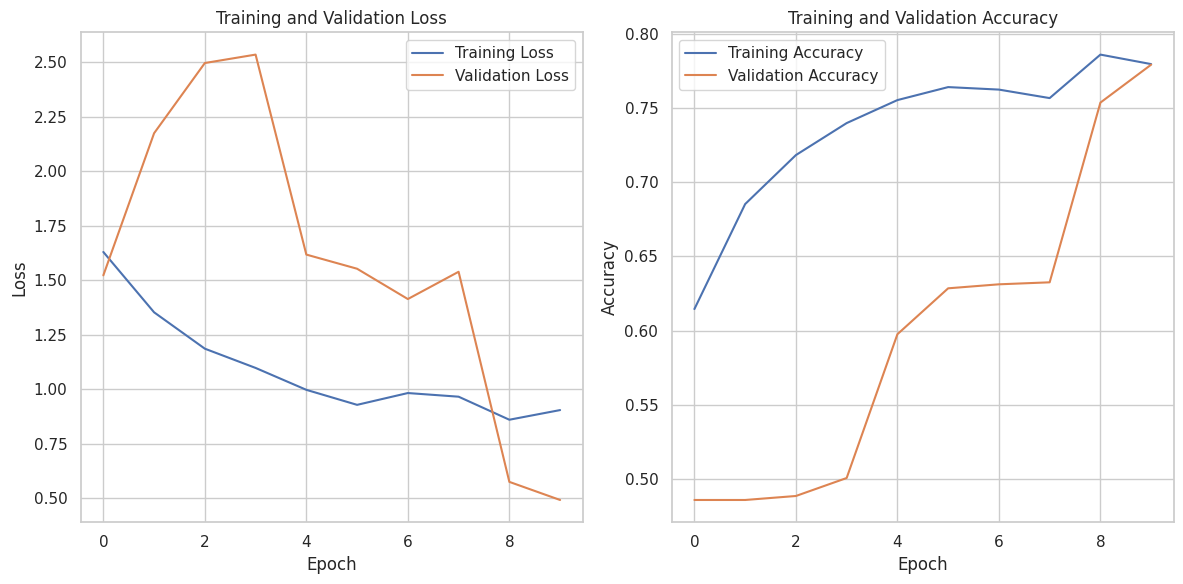

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_images, val_labels)
print(f'Validation Loss={loss:.3f}, Validation Accuracy={accuracy:.3f}')

# Plot training and validation metrics using Seaborn
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
sns.lineplot(data=history.history['loss'], label='Training Loss')
sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Confusion Matrix Visualization for Model Predictions

24/24 [==============================] - 4s 185ms/step


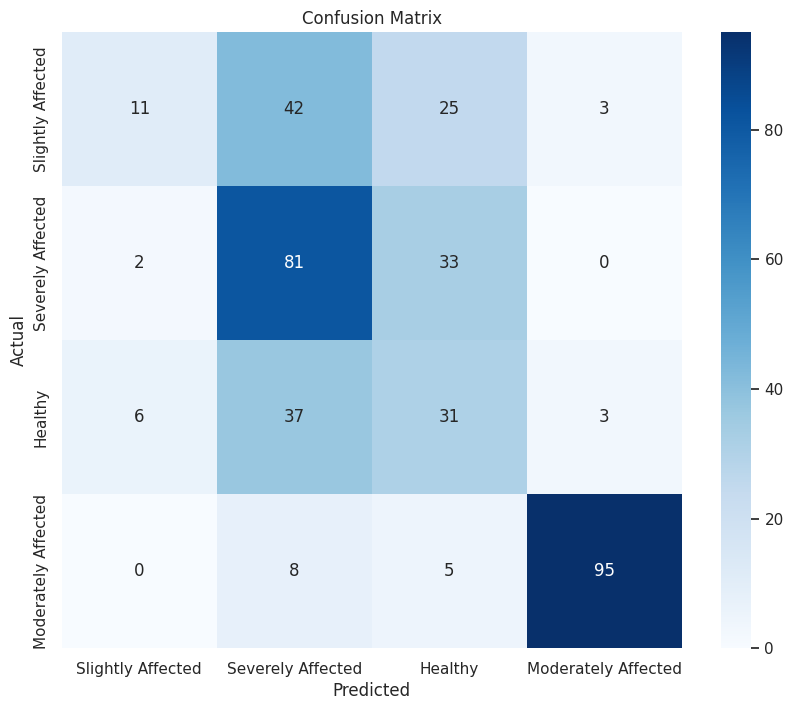

In [ ]:
from sklearn.metrics import confusion_matrix
# Define label mapping based on the clusters
label_mapping = {
    3: "Healthy",
    1: "Slightly Affected",
    4: "Moderately Affected",
    2: "Severely Affected",
    0: "Completely Spoiled"  # This will be ignored in plotting
}

# Create severity labels in the correct order
severity_labels = [label_mapping[i] for i in range(len(label_mapping)) if i != 0]

# Confusion Matrix
val_predictions = model.predict(val_images)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Generate and visualize the confusion matrix
cm = confusion_matrix(val_labels, val_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm[1:, 1:], annot=True, fmt='d', cmap='Blues',  # Ignore the first row and column for "Completely Spoiled"
             xticklabels=severity_labels,
             yticklabels=severity_labels)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### AUC-ROC Curve Visualization for Multi-Class Classification

24/24 [==============================] - 5s 195ms/step


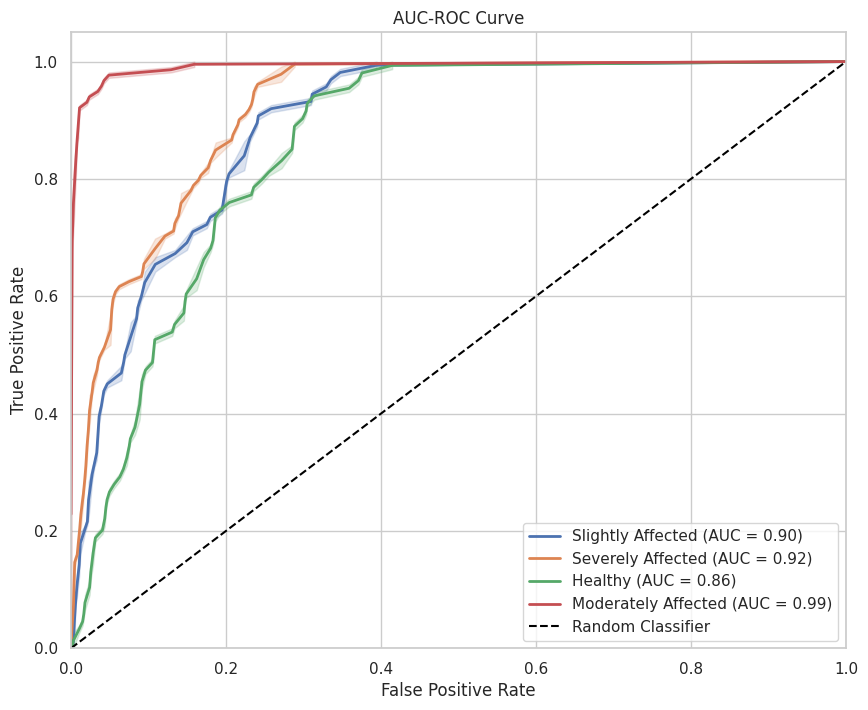

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have the true labels and predictions
val_labels_binarized = label_binarize(val_labels, classes=[0, 1, 2, 3, 4])  # Update with actual number of classes
n_classes = val_labels_binarized.shape[1]

# Get predicted probabilities
val_predictions_prob = model.predict(val_images)  # Ensure this gives you class probabilities

# Initialize lists to hold FPR, TPR, and AUC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate FPR, TPR and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_labels_binarized[:, i], val_predictions_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plotting the AUC-ROC curve
plt.figure(figsize=(10, 8))

# Plot each class's AUC-ROC curve
for i in range(1, n_classes):  # Start from 1 to skip "Completely Spoiled"
    sns.lineplot(x=fpr[i], y=tpr[i], label=f'{severity_labels[i-1]} (AUC = {roc_auc[i]:.2f})', linewidth=2)

# Plot the diagonal line for a random classifier
sns.lineplot(x=[0, 1], y=[0, 1], label='Random Classifier', color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()
